## what will this notebook do ? 

#### - Train a neural network to solve XOR problem 
#### - Implement backpropagation 
#### - Adjust the weights and biases via gradient descent 
#### - Evaluate the models performance
#### - Visualize the results 


In [1]:
# import the libararies ill need

import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
# define the inputs and expected outputs 

X = np.array([[0,0], [0,1], [1,0], [1,1]]).T 
d= np.array([0,1,1,0])# expected output
 

In [11]:
def intialize_network_parameters():
    input_size = 2
    hidden_size = 2
    output_size = 1
    lr = 0.1
    epochs = 180000
    

    w1 = np.random.rand(hidden_size, input_size) * 2 -1 
    b1 = np.random.rand(hidden_size, 1) * 2 -1
    w2 = np.random.rand(output_size, hidden_size) * 2 -1
    b2 = np.random.rand(output_size, 1) * 2 -1

    return w1, b1, w2, b2, lr, epochs

## Training the Neural Network

The neural network works in 5 stages: 
1. Forward pass
    * The input **X** is multiplied by the weights **w1** and passed through the first layer, followed by the application of the sigmoid or ReLU activation function. This gives the output for the hidden layer.
    * The output of the hidden layer is then passed through the second set of weights **w2** to compute the final output. Again, a sigmoid activation function is used to generate the final output **a2**.
    
2. Error calculation
    * The error is computed as the difference between the expected output **(d)** and the actual output **(a2)**.
3. Backward pass
    * **Output Layer**: The derivative of the sigmoid activation function is applied to the error, producing the gradient for the output layer **(da2)**. This is used to calculate how much the weights in the output layer need to be adjusted.
    * **Hidden Layer**: The error is then propagated backward to the hidden layer. The gradient at the hidden layer **(da1)** is computed by taking the dot product of the transpose of the weights **(w2.T)** and the gradient from the output layer. The derivative of the activation function (sigmoid or ReLU) is used to adjust this error.
4. Weights and bias updates
    * After computing the **gradients (dz1, dz2)**, the **weights (w1, w2)** and **biases (b1, b2)** are updated using the **learning rate (lr)** and **the gradients**. The updates are done to minimize the error and improve the model’s predictions.
5. Training:
    * This entire process is repeated over many iterations **(epochs)**. During each epoch, the model adjusts its weights and biases to reduce the error. Over time, the network learns to approximate the XOR function.
Forward Pass:




In [14]:
# Get initialized parameters
w1, b1, w2, b2, lr, epochs = intialize_network_parameters()

error_list = []

for epoch in range(epochs):
    z1 = np.dot(w1,X)+ b1
    a1 = 1/(1 + np.exp(-z1)) #sigmoid function 

    z2 = np.dot(w2,a1)+ b2
    a2 = 1/(1 + np.exp(-z2)) #sigmoid function 

    # error calculation and back propgation 

    error = d - a2 
    da2 = error * (a2 * (1 - a2))
    dz2 = da2 


    # propgate error to thr hidden layer 
    da1 = np.dot(w2.T, dz2) # gradient of the hidden layer 
    dz1 = da1 *(a1 *(1 - a1))

    #update the weights and biases 
    w2 += lr * np.dot(dz2, a1.T)
    b2 += lr * np.sum(dz2, axis = 1, keepdims = True)
    w1 += lr * np.dot(dz1, X.T)
    b1 += lr * np.sum(dz1, axis = 1, keepdims = True)
    
    if(epoch + 1) % 10000 ==0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))
    
    

    
    

Epoch: 9999, Average error: 0.27766
Epoch: 19999, Average error: 0.26665
Epoch: 29999, Average error: 0.26277
Epoch: 39999, Average error: 0.26067
Epoch: 49999, Average error: 0.25932
Epoch: 59999, Average error: 0.25836
Epoch: 69999, Average error: 0.25763
Epoch: 79999, Average error: 0.25706
Epoch: 89999, Average error: 0.25660
Epoch: 99999, Average error: 0.25621
Epoch: 109999, Average error: 0.25589
Epoch: 119999, Average error: 0.25560
Epoch: 129999, Average error: 0.25535
Epoch: 139999, Average error: 0.25514
Epoch: 149999, Average error: 0.25494
Epoch: 159999, Average error: 0.25477
Epoch: 169999, Average error: 0.25461
Epoch: 179999, Average error: 0.25446


In [15]:
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer


print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))



Final output after training: [[0.00785696 0.99027337 0.49986785 0.50013841]]
Ground truth [0 1 1 0]
Error after training: [[-0.00785699  0.00972666  0.50013215 -0.50013842]]
Average error: 0.25446


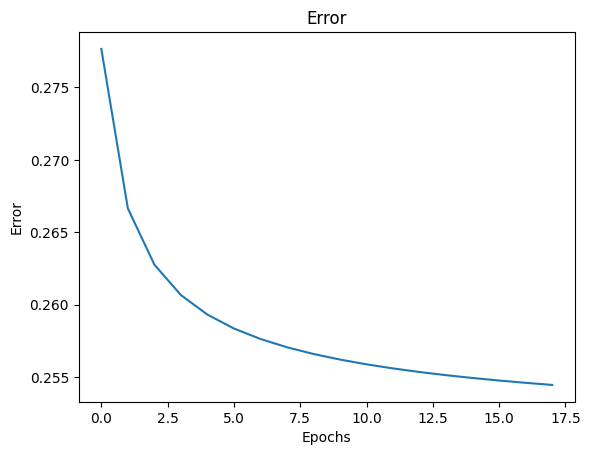

In [16]:
# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show() 